# Creating and manipulating a database in PostgreSQL from Python
## César Muro Cabral

In this project, we are going to clean, load, and normalize, in PostgreSQL and using Python, a large dataset about educational centers in the Mexican State of Zacatecas.
      
Steps:  
- Importing as csv  
- Cleaning the data; the column headers, extra spaces, capital letters...  
- Exporting the data into a PostgreSql database  
- In PostgreSql we normalize the data and create a entity relationship diagram.
- We construct two functions where we connect again to the database and query for the name of the schools and the number of students

We import the data as a pandas dataframe

In [29]:
import os 
import numpy as np
import pandas as pd
df=pd.read_csv("escuelas.csv")
tbl_name="escuelas_zac"

In [1]:
#Since I'm connecting to a database I stored the password as a einvorenment variable
import os
password=os.environ.get('DB_PASSWORD')

Let us look the column properties of the dataframe:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PERIODO                                   5714 non-null   object 
 1   TIPO EDUCATIVO                            5714 non-null   object 
 2   NIVEL EDUCATIVO                           5714 non-null   object 
 3   SERVICIO EDUCATIVO                        5714 non-null   object 
 4   CLAVE ENTIDAD                             5714 non-null   int64  
 5   ENTIDAD                                   5714 non-null   object 
 6   CLAVE MUN./DEL.                           5714 non-null   int64  
 7   MUNICIPIO                                 5714 non-null   object 
 8   CLAVE LOCALIDAD                           5714 non-null   int64  
 9   LOCALIDAD                                 5714 non-null   object 
 10  CLAVE                               

In [165]:
df.head()

,PERIODO,TIPO EDUCATIVO,NIVEL EDUCATIVO,SERVICIO EDUCATIVO,CLAVE ENTIDAD,ENTIDAD,CLAVE MUN./DEL.,MUNICIPIO,CLAVE LOCALIDAD,LOCALIDAD,...,LABORATORIOS,TALLERES,COMPUTADORAS EN OPERACIÃ“N,COMPUTADORAS EN OPERACIÃ“N + INTERNET,COMPUTADORAS EN OPERACIÃ“N USO EDUCATIVO,ALTITUD (msnm),LONGITUD,LATITUD,LONGITUD (gms),LATITUD (gms)
0,2014-2015,EDUCACIÃ“N MEDIA SUPERIOR,BACHILLERATO,BACHILLERATO GENERAL,32,ZACATECAS,20,JEREZ,24,ERMITA DE GUADALUPE,...,3,0,64,20,54,1954.0,-103.032778,22.587778,-103:01:58.000,35:16.0
1,2014-2015,EDUCACIÃ“N MEDIA SUPERIOR,BACHILLERATO,BACHILLERATO GENERAL,32,ZACATECAS,42,SOMBRERETE,42,COLONIA GONZÃLEZ ORTEGA,...,1,1,15,11,11,2204.0,-103.453560,23.965750,-103:27:12.816,57:56.7
2,2014-2015,EDUCACIÃ“N MEDIA SUPERIOR,BACHILLERATO,BACHILLERATO GENERAL,32,ZACATECAS,36,OJOCALIENTE,1,OJOCALIENTE,...,2,4,37,32,32,2045.0,-102.246600,22.563320,-102:14:47.760,33:47.9
3,2014-2015,EDUCACIÃ“N MEDIA SUPERIOR,BACHILLERATO,BACHILLERATO GENERAL,32,ZACATECAS,38,PINOS,1,PINOS,...,3,0,25,0,21,2470.0,-101.578466,22.291599,-101:34:42.479,17:29.8
4,2014-2015,EDUCACIÃ“N MEDIA SUPERIOR,BACHILLERATO,BACHILLERATO GENERAL,32,ZACATECAS,40,SAIN ALTO,1,SAIN ALTO,...,3,3,47,28,40,2038.0,-103.262450,23.580480,-103:15:44.820,34:49.7


We observe that our data needs a lot of cleaning. We start by cleaning the column names; lowering, removing spaces and errors caused by accents, etc. 

In [89]:
df.columns

Index(['PERIODO', 'TIPO EDUCATIVO', 'NIVEL EDUCATIVO', 'SERVICIO EDUCATIVO',
       'CLAVE ENTIDAD', 'ENTIDAD', 'CLAVE MUN./DEL.', 'MUNICIPIO',
       'CLAVE LOCALIDAD', 'LOCALIDAD', 'CLAVE', 'TURNO', 'AMBITO',
       'CENTRO EDUCATIVO', 'CONTROL', 'DOMICILIO', 'NUM. EXTERIOR',
       'ENTRE CALLE', 'Y CALLE', 'CALLE POSTERIOR', 'CÃ“DIGO POSTAL', 'LADA',
       'TELÃ‰FONO', 'CORREO ELECTRÃ“NICO', 'TOTAL DE PERSONAL',
       'PERSONAL MUJERES', 'PERSONAL HOMBRES', 'TOTAL DE DOCENTES',
       'DOCENTES MUJERES', 'DOCENTES HOMBRES', 'TOTAL DE ALUMNOS',
       'ALUMNOS MUJERES', 'ALUMNOS HOMBRES', 'TOTAL DE GRUPOS',
       'AULAS EXISTENTES', 'AULAS EN USO', 'LABORATORIOS', 'TALLERES',
       'COMPUTADORAS EN OPERACIÃ“N', 'COMPUTADORAS EN OPERACIÃ“N + INTERNET',
       'COMPUTADORAS EN OPERACIÃ“N USO EDUCATIVO', 'ALTITUD (msnm)',
       'LONGITUD', 'LATITUD', 'LONGITUD (gms)', 'LATITUD (gms)'],
      dtype='object')

In [30]:
df.columns=[x.lower().replace(" ","_").replace("./del.","icipal").replace("ã‰","e").replace("ã“","o").replace("(","").replace(")","").replace("m.","m").replace("+","mas") for x in df.columns]
# Alternative:
# df.columns=df.columns.str.lower().str.replace(" ","_").str.replace("./del.","icipal").str.replace("ã‰","e").str.replace("ã“","o").str.strip(")").str.strip("(")
print(df.columns)

Index(['periodo', 'tipo_educativo', 'nivel_educativo', 'servicio_educativo',
       'clave_entidad', 'entidad', 'clave_municipal', 'municipio',
       'clave_localidad', 'localidad', 'clave', 'turno', 'ambito',
       'centro_educativo', 'control', 'domicilio', 'num_exterior',
       'entre_calle', 'y_calle', 'calle_posterior', 'codigo_postal', 'lada',
       'telefono', 'correo_electronico', 'total_de_personal',
       'personal_mujeres', 'personal_hombres', 'total_de_docentes',
       'docentes_mujeres', 'docentes_hombres', 'total_de_alumnos',
       'alumnos_mujeres', 'alumnos_hombres', 'total_de_grupos',
       'aulas_existentes', 'aulas_en_uso', 'laboratorios', 'talleres',
       'computadoras_en_operacion', 'computadoras_en_operacion_mas_internet',
       'computadoras_en_operacion_uso_educativo', 'altitud_msnm', 'longitud',
       'latitud', 'longitud_gms', 'latitud_gms'],
      dtype='object')


Now, we look in each column to correct the bad characters such as Ã“ or Ã‘,these bad characters are caused by the use of accents and when importing or exporting the files.

In [31]:
string_columns=df.dtypes[df.dtypes=="object"].index

In [32]:
for col in string_columns:
    print(df[col].unique())


We clean the incorrect characters:

In [33]:
for col in string_columns:
    df[col]=df[col].str.replace("Ã“","O").str.replace("Ã‰","E").str.replace("Ã\x8d","I").str.replace("Ã\x81","A").str.replace("Ã‘","N").str.replace("Ãš","U")

In [34]:
for col in string_columns:
    print(df[col].unique())

['2014-2015' '2013-2014']
['EDUCACION MEDIA SUPERIOR' 'EDUCACION BASICA' 'EDUCACION ESPECIAL'
 'CAPACITACION P. TRABAJO' 'EDUCACION SUPERIOR']
['BACHILLERATO' 'PROFESIONAL TECNICO' 'PREESCOLAR' 'PRIMARIA' 'SECUNDARIA'
 'CAM' 'USAER' 'C. P/TRABAJO' 'POSGRADO' 'LICENCIATURA'
 'LICENCIATURA S.A.' 'POSGRADO S.A.']
['BACHILLERATO GENERAL' 'BACHILLERATO TECNICO' 'PROFESIONAL TECNICO'
 'PROFESIONAL TECNICO B' 'CENDI' 'PREESCOLAR GENERAL' 'PREESCOLAR CONAFE'
 'PRIMARIA GENERAL' 'PRIMARIA CONAFE' 'SECUNDARIA GENERAL'
 'SECUNDARIA TECNICA' 'TELESECUNDARIA' 'CAM' 'SECUNDARIA COMUNITARIA'
 'USAER' 'FORMACION P. TRABAJO' 'SECUNDARIA MIGRANTE' 'ESPECIALIDAD'
 'LIC. UNIV. Y TEC.' 'NORMAL' 'TECNICO SUPERIOR' 'LIC. UNIV. Y TEC. S.A.'
 'DOCTORADO' 'MAESTRIA S.A.' 'MAESTRIA' 'ESPECIALIDAD S.A.'
 'DOCTORADO S.A.']
['ZACATECAS']
['JEREZ' 'SOMBRERETE' 'OJOCALIENTE' 'PINOS' 'SAIN ALTO' 'CHALCHIHUITES'
 'APOZOL' 'APULCO' 'ATOLINGA' 'BENITO JUAREZ' 'CANITAS DE FELIPE PESCADOR'
 'CUAUHTEMOC' 'TRINIDAD GARCIA DE

We could follow by checking the correct dtypes of some columns, but it is out of our interest.   
Let us check one more time and add a new column "id_int" which will serve as index.  

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   periodo                                  5714 non-null   object 
 1   tipo_educativo                           5714 non-null   object 
 2   nivel_educativo                          5714 non-null   object 
 3   servicio_educativo                       5714 non-null   object 
 4   clave_entidad                            5714 non-null   int64  
 5   entidad                                  5714 non-null   object 
 6   clave_municipal                          5714 non-null   int64  
 7   municipio                                5714 non-null   object 
 8   clave_localidad                          5714 non-null   int64  
 9   localidad                                5714 non-null   object 
 10  clave                                    5714 no

In [36]:
print(df.columns)

Index(['periodo', 'tipo_educativo', 'nivel_educativo', 'servicio_educativo',
       'clave_entidad', 'entidad', 'clave_municipal', 'municipio',
       'clave_localidad', 'localidad', 'clave', 'turno', 'ambito',
       'centro_educativo', 'control', 'domicilio', 'num_exterior',
       'entre_calle', 'y_calle', 'calle_posterior', 'codigo_postal', 'lada',
       'telefono', 'correo_electronico', 'total_de_personal',
       'personal_mujeres', 'personal_hombres', 'total_de_docentes',
       'docentes_mujeres', 'docentes_hombres', 'total_de_alumnos',
       'alumnos_mujeres', 'alumnos_hombres', 'total_de_grupos',
       'aulas_existentes', 'aulas_en_uso', 'laboratorios', 'talleres',
       'computadoras_en_operacion', 'computadoras_en_operacion_mas_internet',
       'computadoras_en_operacion_uso_educativo', 'altitud_msnm', 'longitud',
       'latitud', 'longitud_gms', 'latitud_gms'],
      dtype='object')


We create a new columns of sequential integers that will be useful later for a primary key

In [38]:
df["id_int"] = pd.Series(np.arange(1, len(df) + 1))

In [40]:
df.lada.value_counts()

1496.0    838
1493.0    621
1492.0    598
1458.0    485
1457.0    404
1498.0    402
1433.0    297
1494.0    268
1842.0    239
1463.0    228
1467.0    206
1437.0    186
1499.0    166
1346.0    166
1478.0    129
1200.0     28
1844.0     15
Name: lada, dtype: int64

Let us initialize the process of exporting the final dataframe to PostgreSql.    
First, we establish the connection with my local PostgreSql with the database called 'postgres'.  

In [41]:
import psycopg2
connection= psycopg2.connect(host='localhost',database='postgres',user='postgres',password=password)
cur=connection.cursor()
print("Connection succesful")

Connection succesful


Now, we create the complex query that will generate the table database. We start by matching the equivalent format between the different data types in sql and pandas.

In [42]:
#Replacement dictionary between data types of pandas and sql
replacements={'object': 'varchar', 'float64':'float','int32':'int' ,'int64':'int','datetime64':'timestamp'}

In [43]:
#We create the table schema  
col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(df.columns, df.dtypes.replace(replacements)))

We verify that the map is correct; the column name follow by the datatype:

In [44]:
print(col_str)

periodo varchar, tipo_educativo varchar, nivel_educativo varchar, servicio_educativo varchar, clave_entidad int, entidad varchar, clave_municipal int, municipio varchar, clave_localidad int, localidad varchar, clave varchar, turno varchar, ambito varchar, centro_educativo varchar, control varchar, domicilio varchar, num_exterior varchar, entre_calle varchar, y_calle varchar, calle_posterior varchar, codigo_postal float, lada float, telefono varchar, correo_electronico varchar, total_de_personal int, personal_mujeres int, personal_hombres int, total_de_docentes int, docentes_mujeres int, docentes_hombres int, total_de_alumnos int, alumnos_mujeres int, alumnos_hombres int, total_de_grupos int, aulas_existentes int, aulas_en_uso int, laboratorios int, talleres int, computadoras_en_operacion int, computadoras_en_operacion_mas_internet int, computadoras_en_operacion_uso_educativo int, altitud_msnm float, longitud float, latitud float, longitud_gms varchar, latitud_gms varchar, id_int int


We know that to create a table in SQL, we follow the syntax: CREATE TABLE table_name(col_1 DATATYPE, col_2 DATATYPE, ... ) that is the reason we create col_str. Now, with the command execute we generate the table:

In [45]:
#Creating the table
cur.execute("drop table if exists %s;" % (tbl_name))
cur.execute("CREATE TABLE %s(%s);" % (tbl_name,col_str))
#It is important to use the following method to commit our transaction into Postgre. Otherwise it will not be saved it
connection.commit()

In [283]:
df.columns

Index(['id_int', 'periodo', 'tipo_educativo', 'nivel_educativo',
       'servicio_educativo', 'clave_entidad', 'entidad', 'clave_municipal',
       'municipio', 'clave_localidad', 'localidad', 'clave', 'turno', 'ambito',
       'centro_educativo', 'control', 'domicilio', 'num_exterior',
       'entre_calle', 'y_calle', 'calle_posterior', 'codigo_postal', 'lada',
       'telefono', 'correo_electronico', 'total_de_personal',
       'personal_mujeres', 'personal_hombres', 'total_de_docentes',
       'docentes_mujeres', 'docentes_hombres', 'total_de_alumnos',
       'alumnos_mujeres', 'alumnos_hombres', 'total_de_grupos',
       'aulas_existentes', 'aulas_en_uso', 'laboratorios', 'talleres',
       'computadoras_en_operacion', 'computadoras_en_operacion_mas_internet',
       'computadoras_en_operacion_uso_educativo', 'altitud_msnm', 'longitud',
       'latitud', 'longitud_gms', 'latitud_gms'],
      dtype='object')

We create a csv file with the dataframe, open it in python, and copy the values to our new postgre table


In [46]:
#Now we create a csv with the dataframe and load to the new table
df.to_csv("%s" % (tbl_name),header=df.columns, index=False,encoding='utf-8')

Finally, we upload the data

In [47]:
my_file=open("%s" %(tbl_name))
sql_statement=""" COPY %s FROM STDIN WITH CSV HEADER DELIMITER AS ',' """
cur.copy_expert(sql=sql_statement % (tbl_name), file=my_file)
connection.commit()   
cur.close()                   

## Database normalization

By using pgAdmin 4, we normalized the original table into 2nd and 3rd normal forms. We created these tables with a sequence of statements  
CREATE TABLE ____ AS  
SELECT ____   
FROM public.escuela_zac  
Then, we fixed constraints for the primary key and foreign keys. Notice that from the dataframe, we added a column called "id_int" to have a identifier for every row. I though that the column clave would serve as primary key but it has null values. Check the other file in the repository to see the sql statements.  Our entity relational diagram (ERD) has the form: 

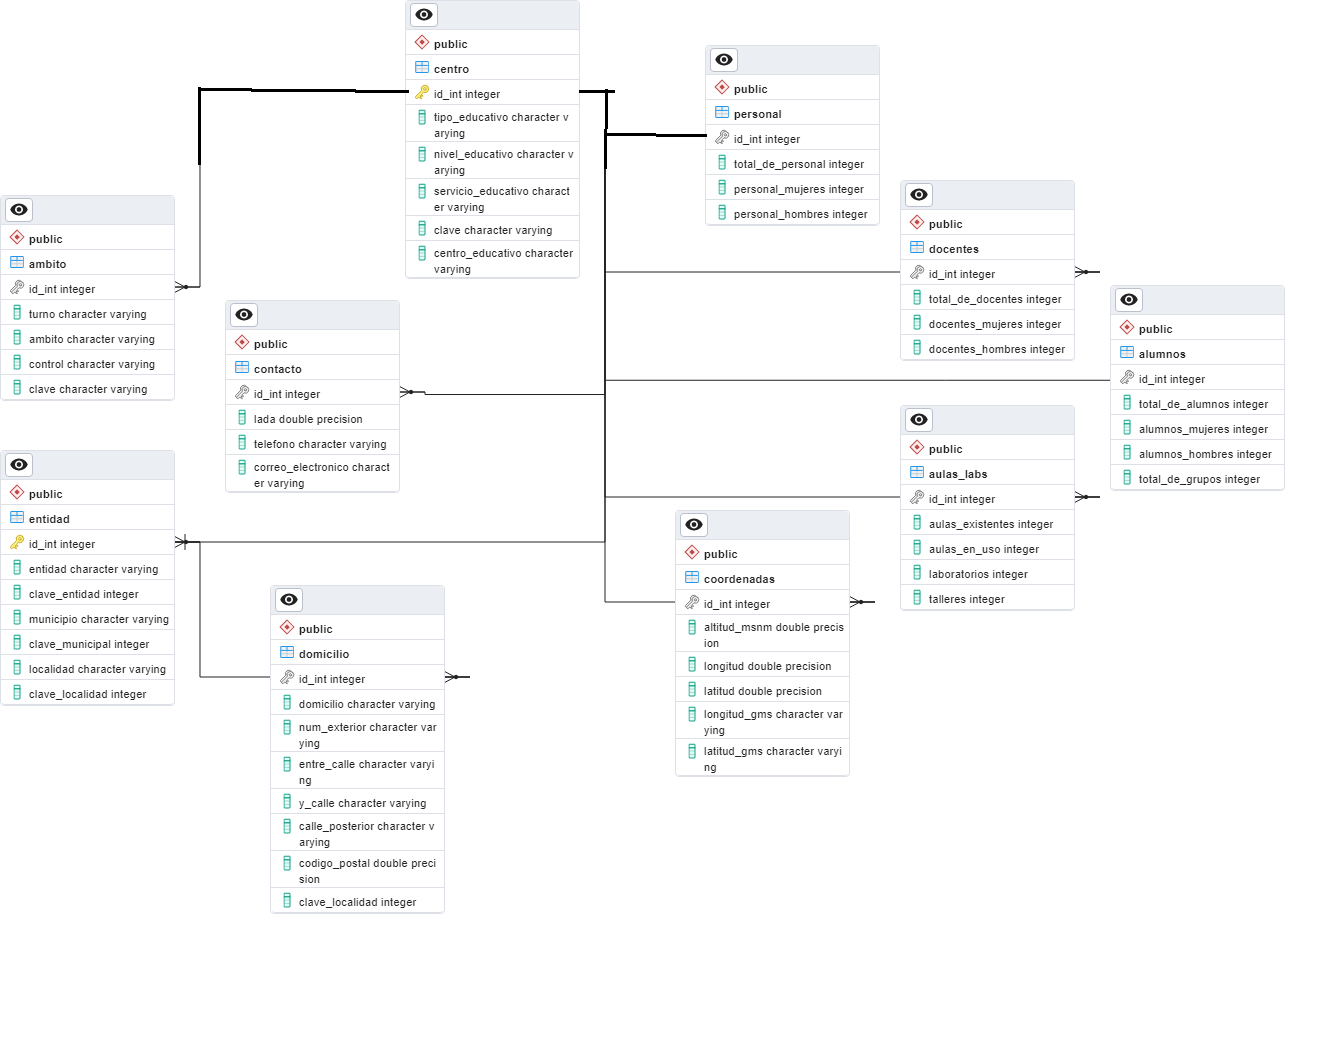

As final tasks, we create two functions: One that allows you to search by school name or fragment of it and return the matches

In [15]:
def nombre_escuela():
    a=input("Introduce el nombre de la escuela, o parte de el, entre comillas y con mayúsculas")
    query=f"SELECT DISTINCT centro_educativo FROM public.centro WHERE centro_educativo LIKE '%{a}%' "
    conn = psycopg2.connect(host='localhost',database='postgres',user='postgres',password=password)
    cur = conn.cursor()
    cur.execute(query)
    results = cur.fetchall()
    cur.close()
    conn.close()
    return results

In [16]:
nombre_escuela()

[('CENTRO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS DEL ESTADO',),
 ('CENTRO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS NUM. 18 ZACATECAS',),
 ('COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS DEL EDO.',),
 ('COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS DEL ESTADO',),
 ('COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS DEL ESTADO PLANTEL RIO GRANDE',),
 ('COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS DEL ESTADO PLANTEL TLALTENANGO',),
 ('COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS DEL ESTADO PLANTEL VICTOR ROSALES',)]

A a function that receives the number of students as a parameter and returns all the schools with that number of students.   
Notice that we have to join two tables for the query.  
Let us first verify the column names

In [49]:
#Column names
conn=psycopg2.connect(host='localhost',database='postgres',user='postgres',password=password)
cur=conn.cursor()
cur.execute("SELECT * FROM public.centro;")
column_names = [desc[0] for desc in cur.description]
for i in column_names:
    print(i)
cur.close()
conn.close()

id_int
tipo_educativo
nivel_educativo
servicio_educativo
clave
centro_educativo
id_escuela


In [3]:
import psycopg2
conn=psycopg2.connect(host='localhost',database='postgres',user='postgres',password=password)
cur=conn.cursor()
cur.execute("SELECT * FROM public.alumnos")
column_names = [desc[0] for desc in cur.description]
for i in column_names:
    print(i)
cur.execute("SELECT * FROM public.alumnos LIMIT 20;")
results=cur.fetchall()
print(results)
cur.close()
conn.close()

id_int
total_de_alumnos
alumnos_mujeres
alumnos_hombres
total_de_grupos
[(1, 325, 158, 167, 11), (2, 315, 158, 157, 11), (3, 623, 304, 319, 20), (4, 661, 335, 326, 24), (5, 519, 262, 257, 13), (6, 326, 167, 159, 10), (7, 163, 77, 86, 6), (8, 299, 154, 145, 9), (9, 113, 63, 50, 4), (10, 197, 108, 89, 6), (11, 402, 203, 199, 10), (12, 305, 152, 153, 9), (13, 124, 68, 56, 4), (14, 269, 150, 119, 9), (15, 502, 248, 254, 14), (16, 48, 20, 28, 3), (17, 1400, 680, 720, 33), (18, 324, 160, 164, 10), (19, 121, 58, 63, 3), (20, 650, 332, 318, 16)]


In [13]:
#We construct the function
def num_alumnos():
    a=input("Introduce el numero de alumnos")
    conn=psycopg2.connect(host='localhost',database='postgres',user='postgres',password=password)
    cur=conn.cursor()
    query_1=f"SELECT c.centro_educativo, a.total_de_alumnos FROM centro AS c INNER JOIN alumnos as a ON c.id_escuela=a.id_int WHERE a.total_de_alumnos={a}"
    cur.execute(query_1)
    results=cur.fetchall()
    print(results)
    cur.close()
    conn.close()

In [14]:
num_alumnos()

[('ESCUELA PREPARATORIA JOSE RODRIGUEZ ELIAS', 325), ('JOSE VASCONCELOS', 325), ('SALVADOR VARELA RESENDIZ', 325), ('COLEGIO DE BACHILLERES', 325)]


## Project finished.